In [1]:
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [17]:
%%time
xgb_valid = pd.read_csv('./output/oof_xgb_95.csv')
real = pd.read_csv('./clean_data/xgb_fraud_with_magic_train.csv')
lgbm_valid = pd.read_csv('./output/lgb_oof.csv')

CPU times: user 14.8 s, sys: 972 ms, total: 15.7 s
Wall time: 15.7 s


In [6]:
xgb_valid.describe()

,Unnamed: 0,TransactionID,oof
count,590540.000000,5.905400e+05,590540.0
mean,295269.500000,3.282270e+06,0.0
std,170474.358321,1.704744e+05,0.0
min,0.000000,2.987000e+06,0.0
25%,147634.750000,3.134635e+06,0.0
50%,295269.500000,3.282270e+06,0.0
75%,442904.250000,3.429904e+06,0.0
max,590539.000000,3.577539e+06,0.0


In [7]:
real.describe()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std,isFraud
count,5.905400e+05,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,7.372311e+06,135.027176,3.220757,8898.734658,258.568729,53.051302,2.604073,98.555681,1.739731,...,-0.104767,-0.069656,-0.377968,327.200762,186.931234,321.732198,167.303633,316.595205,134.297853,0.034990
std,1.704744e+05,4.617224e+06,239.162522,1.423926,4901.170153,159.865285,11.659219,0.615105,41.962326,0.456775,...,0.592788,0.783701,0.640861,140.924299,85.400828,163.620983,96.077100,191.399977,105.326236,0.183755
min,2.987000e+06,8.640000e+04,0.251000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.134635e+06,3.027058e+06,43.321000,3.000000,5019.000000,104.000000,50.000000,2.000000,66.000000,1.000000,...,-1.000000,-1.000000,-1.000000,315.615080,182.994350,280.052670,110.611090,241.444430,0.087695,0.000000
50%,3.282270e+06,7.306528e+06,68.769000,4.000000,8678.000000,260.000000,50.000000,3.000000,126.000000,2.000000,...,0.263156,0.454167,-1.000000,360.342560,218.629090,359.693700,205.604500,342.424900,162.218230,0.000000
75%,3.429904e+06,1.124662e+07,125.000000,4.000000,13184.000000,412.000000,50.000000,3.000000,126.000000,2.000000,...,0.323786,0.607011,0.306186,391.225280,239.790500,406.890380,237.984970,418.113370,225.159410,0.000000
max,3.577539e+06,1.581113e+07,31937.390000,4.000000,17396.000000,500.000000,131.000000,3.000000,137.000000,3.000000,...,0.677644,0.958333,0.677644,881.234300,611.141700,886.154700,611.141700,886.154700,609.250240,1.000000


In [18]:
roc_auc_score(real['isFraud'], xgb_valid['oof']), roc_auc_score(real['isFraud'], lgbm_valid)


(0.9413326765633959, 0.9258194412654817)

In [19]:
%%time
fpr, tpr, thresholds = roc_curve(real['isFraud'], lgbm_valid, pos_label=1)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(real['isFraud'], xgb_valid['oof'], pos_label=1)

CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 230 ms


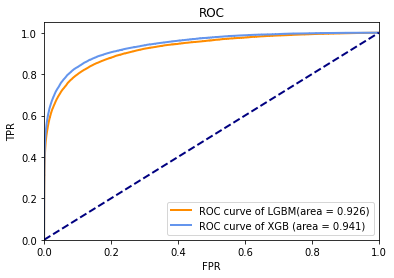

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of LGBM(area = %0.3f)' % roc_auc_score(real['isFraud'], lgbm_valid))

plt.plot(fpr_lgbm, tpr_lgbm, color='cornflowerblue',
         lw=lw, label='ROC curve of XGB (area = %0.3f)' % roc_auc_score(real['isFraud'], xgb_valid['oof']))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.hist(xgb_valid, bins=100)
plt.ylim((0,5000))
plt.title('XGB OOF')
plt.show()